In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### Load Seaborn iris dataset

In [4]:
iris = sns.load_dataset("iris")
iris.head()
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


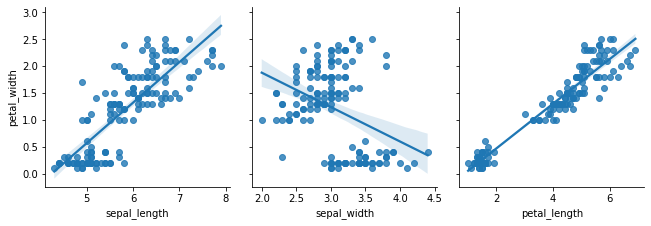

In [5]:
# sns.set()
# This pairplot is more for REGRESSION data
%matplotlib inline
sns.pairplot(iris, x_vars = ["sepal_length", "sepal_width", "petal_length"], y_vars= "petal_width", size=3, aspect=1, kind="reg")

# # These chart below are more for categorical data
# # sns.swarmplot(x="species", y="sepal_width", data=data)
# # sns.stripplot(x="species", y="petal_width", data=data)

# fig, (ax1, ax2) = plt.subplots(1,2)
# sns.swarmplot(x="species", y="sepal_width", data=iris, ax=ax1)
# sns.stripplot(x="species", y="petal_width", data=iris, ax=ax2) # ideal for categorical values
# fig.show()

In [6]:
# sns.set_style("whitegrid") # dark, white
# sns.set_style("ticks")
# sns.barplot(x="species", y="petal_width", data=iris)
# sns.boxplot(x="species", y="petal_width", data=iris)
# sns.despine(left=True)

## Load SKLEARN iris dataset here

In [7]:
iris = load_iris()
# type(iris)
# print("Iris looks like: ", iris)
# print("Dataset shape is: " , iris.data.shape)

In [8]:
print(iris.feature_names) # .feature_names is an attribute. Its the column/feature headers for the data

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
print(iris.target) # .target is an attribute. The target is what we are going to predict
print(iris.target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)


In [10]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [11]:
X = iris.data # .data is an attribute. Its all the data for each of the features for each flower
y= iris.target # puts all the categorical values for each data point


In [12]:
# linear discriminant analysis (Fisher)
# Supervised learning (we know the data, ie. the iris measurement and the output, ie. the species of iris)
# UNsupervised learning - Unlabeled data (this is if we only know the measurement, but NOT the species), maybe clustering

In [13]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


#### Step 1 - Import class/model you want to use. Within sklearn (iris_dataset), import the class (KNN)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

#### Step 2 - Instantiate the "estimator" (primary role of KNN is to estimate unknown quantities)

In [15]:
knn = KNeighborsClassifier(n_neighbors = 1) # look for the 1 nearest neighbor

In [16]:
print(knn) # this tells you all the parameters for this model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


#### Step 3 - Fit the model with data (Model training. Model is learning the relationship between X and y)

In [17]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### Step 4 - Predict the response for the new observation

In [18]:
# Predict based on n_neighbor = 1

X_new = [[1,2,3,4], [5,4,3,2]]
knn.predict(X_new)

array([2, 1])

In [19]:
# How about if we changed n_neighbors value to 5?? # Predict based on n_neighbor = 5
knn5 = KNeighborsClassifier(n_neighbors = 5) 
knn5.fit(X, y)
knn5.predict(X_new)

array([1, 1])

In [20]:
# How about if we changed to a different model like Logistic Regression?

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
logreg.predict(X_new)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([2, 0])

#### Each model predicted 3 different results!!  Which is better model to predict???

## EVALUATION PROCEDURE 1 - train and test on ENTIRE dataset

In [ ]:
# Using LogisticRegression first. Pass in X data into predict model.  Compare y true and y predicted

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
y_predicted = logreg.predict(X)
len(y_predicted)

In [ ]:
from sklearn import metrics
print("Training accuracy LogReg (% of predictions that were correct) is:", metrics.accuracy_score(y, y_predicted))
# This is also known as TRAINING ACCURACY because we are TESTING the model on the SAME data that we 
# used to TRAIN the model

In [ ]:
# Testing on KNN n_neighbor=1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y)
y_predicted_knn1 = knn.predict(X)
print("Training accuracy KNN1 (% of predictions that were correct) is:", metrics.accuracy_score(y, y_predicted_knn1))

In [1]:
# Testing on KNN n_neighbor=5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X,y)
y_predicted_knn5 = knn.predict(X)
print("Training accuracy KNN5 (% of predictions that were correct) is:", metrics.accuracy_score(y, y_predicted_knn5))

NameError: name 'X' is not defined

### Training and testing on the entire dataset is NOT optimal!!

## EVALUATION PROCEDURE 2 - train/test split
#### Because we're splitting, training on training data and testing on testing data, we are more ACCURATELY simulating how well a model is likely to perform on OUT-OF-SAMPLE data.  TESTING ACCURACY is a better estimate than training accuracy of out-of-sample performance

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.2)
len(X_test)

In [2]:
# Test of LogRegression with Train/Test split
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)

from sklearn import metrics
print("TESTING accuracy LogReg (% of predictions that were correct) is:", metrics.accuracy_score(y_test, y_predicted))

NameError: name 'X_train' is not defined

In [ ]:
# Testing on KNN n_neighbor=1 with Train/Test split
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
y_predicted_knn1 = knn.predict(X_test)
print("TESTING accuracy KNN1 (% of predictions that were correct) is:", metrics.accuracy_score(y_test, y_predicted_knn1))

In [ ]:
# Testing on KNN n_neighbor=5 with Train/Test split
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_predicted_knn5 = knn.predict(X_test)
print("TESTING accuracy KNN5 (% of predictions that were correct) is:", metrics.accuracy_score(y_test, y_predicted_knn5))

In [ ]:
# Is there a better K value than 5? Lets test k = 1 to 100

k_range = range(1,100)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_predicted = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_predicted))


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel("Value for k in KNN")
plt.ylabel("Accuracy score")

In [ ]:
# Training accuracy RISES as model complexity increase
# Testing accuracy penalizes models that are too complex OR not complex enough
# For KNN models, complexity is determined by the value of K (lower value = more complex)

In [ ]:
# Alternative model evaluation procedure called K FOLD CROSS VALIDATION 

In [ ]:
# When you found you're right model and optimal parameter, RETRAIN your model using ALL TRAINING data to
# be most accurate.  Then you can use this model to predict OUT-OF-SAMPLE data.